#TASK 1
#RDD IMPLEMENTATION 

##part 1: Load / ingest the data to be analysed

In [0]:
# check for the clinicaltrial_2023 and pharma file if it is uploaded 
dbutils.fs.ls('/FileStore/tables')

[FileInfo(path='dbfs:/FileStore/tables/.Test-unix/', name='.Test-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.XIM-unix/', name='.XIM-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.font-unix/', name='.font-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709138386000),
 FileInfo(path='dbfs:/FileStore/tables/SQLcount_month.csv/', name='SQLcount_month.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1709709833000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationT

##make the code reusable for any file

In [0]:
#define a variable clinical_trial
fileroot = 'clinicaltrial_2020'

#define a variable for pharma
fileroot2 = 'pharma'

In [0]:
# clean the local file system from the contents that the notebook needs to create again
import os
#clean clinicaltrial files from the file system
os.system("rm -rf /tmp/" + fileroot + "*")

#clean pharma files from file system
os.system('rm -rf /tmp/'+ fileroot2 + '*')

0

In [0]:
# clean clinicaltrial file from DBFS so that the notebook needs to create again  
dbutils.fs.rm('/FileStore/tables/' + fileroot, True)

#clean pharam file from DBFS so that the notebook needs to create again
dbutils.fs.rm('FileStore/tables/' + fileroot2, True)

True

In [0]:
#copy clinicaltrial file from DBFS to Local File System
dbutils.fs.cp('/FileStore/tables/' + fileroot + '.zip', 'file:/tmp/')

#copy pharma file from DBFS to local file system
dbutils.fs.cp('FileStore/tables/' + fileroot2 + '.zip', 'file:/tmp/')

True

In [0]:
import os
#apply os funnction to access fileroot
os.environ['fileroot'] = fileroot

#apply os function to access fileroot2
os.environ['fileroot2'] = fileroot2

In [0]:
%sh
#unzip fileroot 
unzip -o -d /tmp /tmp/$fileroot.zip

#unzip fileroot2
unzip -o -d /tmp /tmp/$fileroot2.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh # checking if the file is already unzipped 
ls /tmp/

Rserv
RtmpIJTyix
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.csv
clinicaltrial_2020.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
python_lsp_logs
systemd-private-6885159ad6e7404bb0b178196d42a783-systemd-logind.service-blhoIY
systemd-private-6885159ad6e7404bb0b178196d42a783-systemd-resolved.service-HimXVm
tmp.8G9q7DOvKf


In [0]:
#making a directory for the unzip fileroot in DBFS 
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

#making a directory for the unzip fileroot2 in DBFS
dbutils.fs.mkdirs('FileStore/tables/' + fileroot2)

True

In [0]:
#move the unzip fileroot from Local file system to the created directory in DBFS 
dbutils.fs.mv("file:/tmp/" + fileroot + '.csv', "/FileStore/tables/" + fileroot + '.csv', True)

#move the unzip fileroot2 from the local file system to the created direcory in DBFS
dbutils.fs.mv('file:/tmp/' + fileroot2 + '.csv', '/FileStore/tables/' + fileroot2 + '.csv', True)

True

In [0]:
#check the file directory 
dbutils.fs.ls('/FileStore/tables/')

[FileInfo(path='dbfs:/FileStore/tables/.Test-unix/', name='.Test-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.XIM-unix/', name='.XIM-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.font-unix/', name='.font-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709138386000),
 FileInfo(path='dbfs:/FileStore/tables/SQLcount_month.csv/', name='SQLcount_month.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1709709833000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationT

##part 2: Prepare / clean the data for RDD implementation.

In [0]:
# display the content of the file
print(dbutils.fs.head('/FileStore/tables/clinicaltrial_2023.csv'))

[Truncated to first 65536 bytes]
"Id	Study Title	Acronym	Status	Conditions	Interventions	Sponsor	Collaborators	Enrollment	Funder Type	Type	Study Design	Start	Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"NCT03630471	Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India	PRIDE	COMPLETED	Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)	BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care	Sangath	Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine	250.0	OTHER	INTERVENTIONAL	Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT	2018-08-20	2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
#create an RDD and remove excess punctuation marks 
myRdd1 = sc.textFile('/FileStore/tables/clinicaltrial_2023.csv')
myRdd2 = myRdd1.map(lambda line: line.replace(',', '').replace('"', ''))

#show first five rows 
myRdd2.take(5)

['Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion',
 "NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",
 "NCT05992571\tOral Ketone Monoester Supplementation and Resting-state Brain Connectivity\t\tRECRUITING\tCerebrovascular Function|Cognition\tOTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB\tMcMaster University\tAlzheimer's Society of Brant Haldimand Norfolk Hamilto

In [0]:
# Splitting the content of the file based on '\t' delimiter 
myrdd3 = myRdd2.map(lambda row: row.split('\t'))
myrdd3.take(5)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cog

In [0]:
#Create a user define function
def filter_row_length(row, column_length):     
    #return true if length of rows matches length of column header, else return false 
    match_length = len(row) == column_length 
    return match_length

#count the length of column header
myrdd3_header = len(myrdd3.first())

#Filter rows in myrdd3 base on length of rows equals MYRRD
RDD = myrdd3.filter(lambda row: filter_row_length(row, myrdd3_header))

#Analyse the Data

###Question 1: The number of studies in the dataset. You must ensure that you explicitly check distinct studies

In [0]:
# remove the header from the RDD 
study_header = RDD.first() 

#Filter line in RDD and return first 2 elements
clean_study_header = RDD.filter(lambda line: line != study_header)
clean_study_header.take(2)


[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RA

In [0]:
#apply map transformatoin to select the second column and its content
myrdd4 = clean_study_header.map(lambda row: row[1])
myrdd4.take(5)

['Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
 'Impact of Tight Glycaemic Control in Acute Myocardial Infarction',
 'New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation',
 'InTake Care: Development and Validation of an Innovative Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention']

In [0]:
#apply disctinct method to remove duplicate values and count it 
distinct_studies = myrdd4.distinct().count()

#print a message showing the number of distinct studies 
print(f'The total number of distinct studies is: {distinct_studies}')

The total number of distinct studies is: 481083


###Question 2: You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
#apply map transformation to extract Type column at index 10
myrdd5 = RDD.map(lambda row: row[10])
myrdd5.take(5)


['Type',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL']

In [0]:
#remove header from the type column 
Type_header = myrdd5.first()

#filter rows from myrdd5 and return first five elements
remove_header = myrdd5.filter(lambda row: row!=Type_header) 
remove_header.take(5)

['INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL',
 'INTERVENTIONAL']

In [0]:
#count the number of occurences of each line
myrdd6 = remove_header.map(lambda s: (s, 1))
myrdd6.take(5)

[('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1),
 ('INTERVENTIONAL', 1)]

In [0]:
#apply reducebykey method to merge the keys
myrdd7 = myrdd6.reduceByKey(lambda a, b: a+b) 
myrdd7.take(5)

[('INTERVENTIONAL', 371382),
 ('', 889),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

In [0]:
#filter rows in myrdd7 and sort the values in descending order
filter_rdd7 = myrdd7.filter(lambda x: x[0] is not None and x[0]!='').sortBy(lambda x: x[1], ascending=False)

#assign a value to cllect the filtered result 
results = filter_rdd7.collect() 

#loop through the result 
for Type, count in results: 
    print(f"Type= {Type}, count={count}")


Type= INTERVENTIONAL, count=371382
Type= OBSERVATIONAL, count=110221
Type= EXPANDED_ACCESS, count=928


###Question 3: The top 5 conditions (from Conditions) with their frequencies.

In [0]:
#Apply map transformation by extracting the fourth index
myRdd8 =RDD.map(lambda row: row[4])
myRdd8.take(5)

['Conditions',
 'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
 'Cerebrovascular Function|Cognition',
 'Myocardial Infarct|Hyperglycemia',
 'Decompensated Cirrhosis|Liver Transplantation']

In [0]:
#Apply flat map to flatten the result and count the number of occurrence of each line 
condition_rdd = myRdd8.flatMap(lambda row: row.split('|')).map(lambda s: (s, 1))              
condition_rdd.take(5)

[('Conditions', 1),
 ('Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  1),
 ('Cerebrovascular Function', 1),
 ('Cognition', 1),
 ('Myocardial Infarct', 1)]

In [0]:
#use reduceByKey method to merge the keys
myrdd9 = condition_rdd.reduceByKey(lambda a, b: a+b) 
myrdd9.take(5)

[('Hypertension', 4024),
 ('Treatment Adherence and Compliance', 23),
 ('Smoking', 731),
 ('Alcohol Drinking', 277),
 ('Oral Intake Reduced', 2)]

In [0]:
#sort the RDD in descending order
sorted_Rdd = myrdd9.sortBy(lambda x: x[1], ascending=False)

#Assign a variable to return the first 5 conditions
sorted_Rdd = sorted_Rdd.take(5)

# print a message and loop through the sorted RDD
print('The top 5 condtion with their frequencies are:')
for condition, count in sorted_Rdd: 
    print(f"condition= {condition}, count={count}")


The top 5 condtion with their frequencies are:
condition= Healthy, count=9731
condition= Breast Cancer, count=7502
condition= Obesity, count=6549
condition= Stroke, count=4073
condition= Hypertension, count=4024


###Question 4: Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies

In [0]:
#Create RDD from the pharma csv file
pharmfile = '/FileStore/tables/pharma.csv'
pharmRdd = sc.textFile(pharmfile)
pharmRdd.take(2)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
#Clean/prepare the rdd
clean_pharm = pharmRdd.map(lambda row: row.replace('"','')).map(lambda row: row.split(',')[1])
clean_pharm.take(2)

['Parent_Company', 'Abbott Laboratories']

In [0]:
#Remove header from the RDD 
pharmheader = clean_pharm.first() 

#Filter rows from the clean_pharm RDD and return first 5 elements
myrddpharm2 = clean_pharm.filter(lambda row: row!=pharmheader)
myrddpharm2.take(5)

['Abbott Laboratories', 'AbbVie', 'AbbVie', ' Inc.', 'Johnson & Johnson']

In [0]:
#Extract index 6 column
rdd_sponsor = RDD.map(lambda column: (column[6])) 
rdd_sponsor.take(5)

['Sponsor',
 'Sangath',
 'McMaster University',
 'Melbourne Health',
 'Assistance Publique - Hôpitaux de Paris']

In [0]:
#Remove the header by filtering rows from rdd_sponsor where rows are not eqaul to header_sponsor
header_sponsor = rdd_sponsor.first() 
clinical_sponsor = rdd_sponsor.filter(lambda row: row!=header_sponsor)
clinical_sponsor.take(5)

['Sangath',
 'McMaster University',
 'Melbourne Health',
 'Assistance Publique - Hôpitaux de Paris',
 'Istituto Auxologico Italiano']

In [0]:
#Return all unique element from myrddpharm2 
pharmaceutical_companies = set(myrddpharm2.collect())

#Filter sponsor in clinica_sponser and checks if sponsor is not in pharmaceutical companies
non_pharm_sponsors = clinical_sponsor.filter(lambda sponsor: sponsor not in pharmaceutical_companies)

#Return first 3 elements 
non_pharm_sponsors.take(3)

['Sangath', 'McMaster University', 'Melbourne Health']

In [0]:
#Count the occurence of each sponsor and apply reduceByKey transformation
count_non_pharm_sponsors = non_pharm_sponsors.map(lambda sponsor: (sponsor, 1)).reduceByKey(lambda a, b: a+b)
count_non_pharm_sponsors.take(3)

[('University of Oregon', 58),
 ('Johns Hopkins University', 1602),
 ('M.D. Anderson Cancer Center', 2702)]

In [0]:
#Sort the RDD in descending order 
top10Sponsors = count_non_pharm_sponsors.map(lambda pair: (pair[1], pair[0])) \
                                        .sortByKey(ascending=False) \
                                        .take(10)

#loop through the result and print a message 
for count, sponsor in top10Sponsors:
    print(f"Sponsor: {sponsor}, Count: {count}")



Sponsor: National Cancer Institute (NCI), Count: 3410
Sponsor: Assiut University, Count: 3335
Sponsor: Cairo University, Count: 3023
Sponsor: Assistance Publique - Hôpitaux de Paris, Count: 2951
Sponsor: Mayo Clinic, Count: 2766
Sponsor: M.D. Anderson Cancer Center, Count: 2702
Sponsor: Novartis Pharmaceuticals, Count: 2393
Sponsor: National Institute of Allergy and Infectious Diseases (NIAID), Count: 2340
Sponsor: Massachusetts General Hospital, Count: 2263
Sponsor: National Taiwan University Hospital, Count: 2181


###Question 5: Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.

In [0]:
#map the content of RDD and return the first five rows 
myrdd10 = RDD.map(lambda row: row) 
myrdd10.take(1)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion']]

In [0]:
#Apply map transformation to select rows from myrdd10 at index 13 and 3
myrdd11 = myrdd10.map(lambda row: (row[13], row[3]))

#Return the first five element
myrdd11.take(5)

[('Completion', 'Status'),
 ('2019-02-28', 'COMPLETED'),
 ('2024-08', 'RECRUITING'),
 ('2006-05', 'TERMINATED'),
 ('2023-10-01', 'RECRUITING')]

In [0]:
#Remove header from myrdd12 and return the first five element
compheader = myrdd11.first() 
remove_header = myrdd11.filter(lambda x: x!= compheader) 
remove_header.take(5)

[('2019-02-28', 'COMPLETED'),
 ('2024-08', 'RECRUITING'),
 ('2006-05', 'TERMINATED'),
 ('2023-10-01', 'RECRUITING'),
 ('2026-04-01', 'NOT_YET_RECRUITING')]

In [0]:
#filter lines from remove_header by checking first element startswith 2023 and second element match COMPLETED
myrdd13 = remove_header.filter(lambda x: (x[0].startswith('2023') and x[1] == 'COMPLETED')) 

#Return the first five element
myrdd13.take(5)

[('2023-02-24', 'COMPLETED'),
 ('2023-04-07', 'COMPLETED'),
 ('2023-08-27', 'COMPLETED'),
 ('2023-06-30', 'COMPLETED'),
 ('2023-08-01', 'COMPLETED')]

In [0]:
#Apply map tranformation to select the year and month, countt each occurence and use reduceBykey method to merge the value for each key 
myrdd14 = myrdd13.map(lambda x: (x[0][0:4], x[0][5:7])).map(lambda x: (x[1], 1)).reduceByKey(lambda a, b: a+b)

#Return all elements 
myrdd14.collect()

[('06', 1619),
 ('01', 1494),
 ('08', 1230),
 ('12', 1082),
 ('10', 1058),
 ('03', 1552),
 ('02', 1272),
 ('05', 1415),
 ('04', 1324),
 ('07', 1360),
 ('11', 909),
 ('09', 1152)]

In [0]:
#Create a mapping between month numbers and names using python dictionary 
month_names = {'01':'January', '02':'February', '03':'March', '04':'April', 
               '05':'May', '06':'June', '07':'July', '08':'August', '09':'September',
               '10':'October', "11":'November', '12':'December'}

In [0]:
#Apply map transformation on myrdd16 to return the names of month and sort the resutls on index basis 
myrdd15 = myrdd14.map(lambda x: (month_names[x[0]], x[1])).sortBy(lambda x: list(month_names.values()).index(x[0]))

#Return all element
myrdd15.collect()

[('January', 1494),
 ('February', 1272),
 ('March', 1552),
 ('April', 1324),
 ('May', 1415),
 ('June', 1619),
 ('July', 1360),
 ('August', 1230),
 ('September', 1152),
 ('October', 1058),
 ('November', 909),
 ('December', 1082)]

##Using Python Matplotlib Visualization to show the count of completed studies for each month


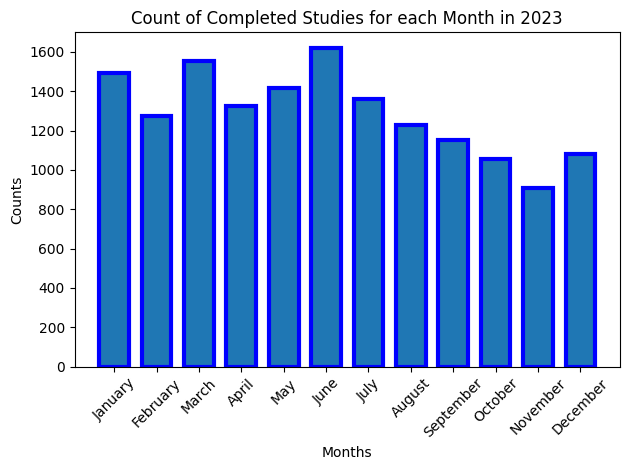

In [0]:
import matplotlib.pyplot as plt
#extract months and counts using list comprehension 
months = [month_count[0] for month_count in myrdd15.collect()]
counts = [month_count[1] for month_count in myrdd15.collect()]

# plot 
fig, ax = plt.subplots()
ax.bar(months, counts, width=0.7, edgecolor='Blue', linewidth=3) 

#customise the plot
ax.set_xlabel('Months') 
ax.set_ylabel('Counts') 
ax.set_title('Count of Completed Studies for each Month in 2023')

plt.xticks(rotation=45) # rotate the x-axis labelling for readability 
plt.tight_layout()# adjust the subplot parameters

plt.show()